## import data from csv file

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron      #Single-layer perceptron
from sklearn.neural_network import MLPClassifier #Multilayer perceptron 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

## data

In [6]:
data = pd.read_csv("glass.csv",index_col=0)

In [7]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


## replace labels to int values(from 0 to 6)

In [8]:
data['Type'] = data['Type'].replace({'building_windows_float_processed' : 0, 'building_windows_non_float_processed' : 1,
                                     'vehicle_windows_float_processed' : 2,  'vehicle_windows_non_float_processed'  : 3,
                                     'containers' : 4, 'tableware' : 5,'headlamps' : 6})

## check Nan-s in dataframe data

In [61]:
data.isnull().sum()

RI      1
Na      0
Mg      1
Al      1
Si      2
K       1
Ca      1
Ba      0
Fe      0
Type    0
dtype: int64

## mean values in each column data

In [62]:
data = data.fillna(data.mean())

## replace Nan -> mean


In [63]:
print('Nan:\n',data.isnull().sum())

Nan:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [64]:
from sklearn.utils import shuffle

## shuffle dataframe (to avoid rep.)

In [65]:
data = shuffle(data)

## shuffled data


In [66]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
83,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.00,0.09,1
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,0
40,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.00,0
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.00,5
100,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22,1


## import split funct.

In [67]:
from sklearn.model_selection import train_test_split

## labels


In [68]:
labels = data['Type']
del data['Type']
X = data
Y = labels
set(list(Y))

{0, 1, 2, 4, 5, 6}

## len

In [69]:
n_samples = len(data)

## split our data in 70/30 % 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test

In [71]:
# Train the scaler, which standarizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [72]:
# Apply the scaler to the X training data
X_train_std = sc.transform(X_train)

In [73]:
# Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

In [74]:
ppn = Perceptron( eta0=0.1, random_state=0)
# Create a multilayer perceptron object
mppn = MLPClassifier(solver='lbfgs', alpha=1e-5,  random_state=1)

In [75]:
ppn.fit(X_train_std, y_train)
mppn.fit(X_train_std, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [76]:
y_pred = ppn.predict(X_test_std)
multi_y_pred = mppn.predict(X_test_std)

## accuracies of the model

In [77]:
print('Single-layer perceptron accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Multilayer perceptron accuracy: %.4f' % accuracy_score(y_test, multi_y_pred))

Single-layer perceptron accuracy: 0.2923
Multilayer perceptron accuracy: 0.6462


## correlation between features in data


In [34]:
correlation = data.corr()

## plot

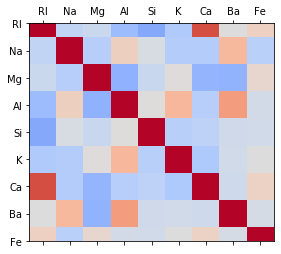

In [35]:

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation,cmap='coolwarm', vmin=-1, vmax=1)

#fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)

#plt.xticks(rotation=90)

ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

plt.show()